In [17]:
# %matplotlib inline
from matplotlib import style
style.use('seaborn-dark')
import matplotlib.pyplot as plt


import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

## Reflect Tables into SQLAlchemy ORM

In [18]:
hawaii = r"sqlite:///hawaii.sqlite"
engine = create_engine(hawaii)

In [19]:
Base = automap_base()
Base.prepare(engine, reflect=True)

## Exploring the Climate Data

In [20]:
Base.classes.keys()


['measurement', 'station']

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [22]:
Station = Base.classes.station
Measurement = Base.classes.measurement

In [23]:
## what does the data look like in the station table?
spam = engine.execute("SELECT * FROM station LIMIT 10;")
for s in spam:
    print(s)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [24]:
## What are the column names and types in the station table
station_columns = inspector.get_columns('station')
for col in station_columns:
    print(col['name'], " == ", col['type'])

id  ==  INTEGER
station  ==  TEXT
name  ==  TEXT
latitude  ==  FLOAT
longitude  ==  FLOAT
elevation  ==  FLOAT


In [25]:
## What does data in the measurement table look like?
spam = engine.execute("SELECT * FROM measurement LIMIT 10;")
for s in spam:
    print(s)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [26]:
## A date column, what is the date range of the data?
spam = engine.execute("SELECT MIN(date), MAX(date) FROM measurement ORDER BY date DESC;")
for s in spam:
    print(s)

('2010-01-01', '2017-08-23')


In [27]:
## what are the column names and types in the measurement table?
measurement_columns = inspector.get_columns("measurement")
for col in measurement_columns:
    print(col["name"], "  ==  ", col["type"])

id   ==   INTEGER
station   ==   TEXT
date   ==   TEXT
prcp   ==   FLOAT
tobs   ==   FLOAT


In [28]:
## how many rows are in each table?
spam = engine.execute("SELECT COUNT(id) FROM station;")
egg = engine.execute("SELECT COUNT(id) FROM measurement;")
for s, e in zip(spam, egg):
    print(f"Station has {s[0]} rows \nMeasurement has {e[0]:,} rows")

Station has 9 rows 
Measurement has 19,550 rows


In [29]:
## 19,550 readings with 9 stations, how many readings for each station?
spam = engine.execute("SELECT s.name, m.station, COUNT(m.id) AS count \
                      FROM station AS s \
                      LEFT JOIN measurement as m ON m.station = s.station\
                      GROUP BY m.station ORDER BY count DESC;")
for s in spam:
    print(s)

('WAIHEE 837.5, HI US', 'USC00519281', 2772)
('WAIKIKI 717.2, HI US', 'USC00519397', 2724)
('KANEOHE 838.1, HI US', 'USC00513117', 2709)
('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669)
('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202)
('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979)
('PEARL CITY, HI US', 'USC00517948', 1372)
('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)


## Plot some of the data

In [30]:
session = Session(engine)

In [31]:
## what does the last year of rain look like? prcp = precipitation, tobs = temperature (F)
last_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= last_year).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [32]:
rain_last_year = pd.DataFrame(results, columns=["date", "precipitation"]).set_index('date')
rain_last_year

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [33]:
rain_last_year.sort_index(inplace=True)
rain_last_year

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


<AxesSubplot:xlabel='date'>

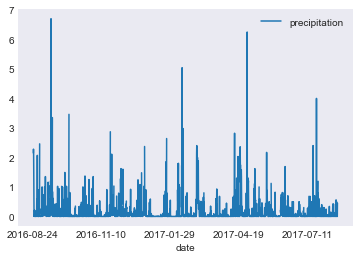

In [34]:
rain_last_year.plot()

In [35]:
## Statistics for last years rain?
rain_last_year.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
## temperature Statistics for the most active station last year
result = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= last_year).all()
temp_last_year = pd.DataFrame(result, columns=["date", "temperature"]).set_index("date")
temp_last_year.sort_index(inplace=True)
temp_last_year.describe()

,temperature
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


<AxesSubplot:xlabel='date', ylabel='temperature'>

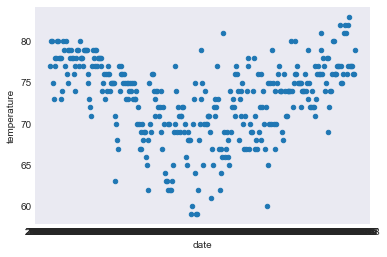

In [37]:
## plot of temperatures from one station for last year
temp_last_year.reset_index().plot(x="date",y="temperature", kind='scatter')

<AxesSubplot:ylabel='Frequency'>

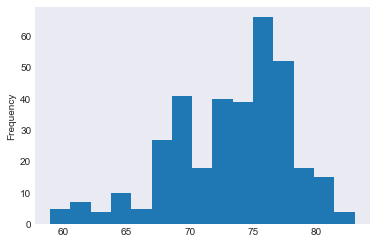

In [38]:
## What is a temperature's recording frequency?
plt.tight_layout()
temps = temp_last_year.reset_index()['temperature']
temps.plot.hist(bins=15)

<AxesSubplot:>

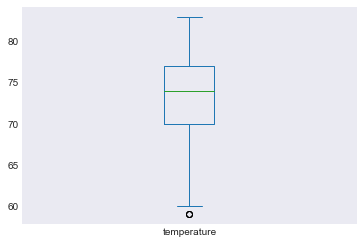

In [39]:
# how does the range of temperatures compare to the statistics?
temp_last_year.plot(kind='box')

In [40]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


In [41]:
def calc_temps(start_date, end_date, db= r"sqlite:///hawaii.sqlite"):
    """ This function calculates the minimum, maximum, and average temeratures for the dates provided. 
        Both parameters must be strings in the format of YYYY-MM-DD. 
    """
    start = dt.datetime.strptime(start_date, "%Y-%m-%d")
    end = dt.datetime.strptime(end_date, "%Y-%m-%d")
    engine = create_engine(db)
    Base = automap_base()
    Base.prepare(engine, reflect=True)
    Measurement = Base.classes.measurement
    session = Session(engine)
    spam = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date>=start).filter(Measurement.date<=end)
    ## Return minimum, maximum, average
    return spam[0]
#     return Base.classes.keys()

In [42]:
spam = calc_temps("2010-05-01", "2010-09-22")

spam

(65.0, 87.0, 74.52677029360967)

In [43]:
help(dt.datetime.strptime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



# Challenge
### Temperatures for the month of June

In [57]:
june = list()
for year in range(2010, 2018):
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=f"{year}-06-01").filter(Measurement.date<=f"{year}-06-30").all()
    june += results
        
pd.DataFrame(june, columns=["date", "June Temps"]).describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [58]:
December = list()
for year in range(2010, 2018):
    results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>=f"{year}-12-01").filter(Measurement.date<=f"{year}-12-31").all()
    june += results
        
pd.DataFrame(june, columns=["date", "December Temps"]).describe()


,December Temps
count,3217.000000
mean,73.103823
std,4.002072
min,56.000000
25%,71.000000
50%,73.000000
75%,76.000000
max,85.000000
